In [1]:
import numpy as np
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

#### Exercise 1.

In [3]:
clicked_A, not_clicked_A = 36, 114
clicked_B, not_clicked_B = 50, 100
prior_alpha, prior_beta = 300, 700

In [4]:
p = np.linspace(beta.ppf(0.01, prior_alpha, prior_beta), beta.ppf(0.99, prior_alpha, prior_beta), 100)

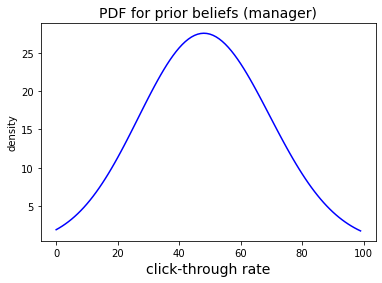

In [5]:
fig, ax = plt.subplots()
ax.plot(beta.pdf(p, prior_alpha, prior_beta), 'b-')
ax.set_title('PDF for prior beliefs (manager)', size= 14)
ax.set_xlabel('click-through rate', size= 14)
ax.set_ylabel('density');

In [6]:
clicked_A, not_clicked_A = clicked_A + prior_alpha, not_clicked_A + prior_beta
clicked_B, not_clicked_B = clicked_B + prior_alpha, not_clicked_B + prior_beta

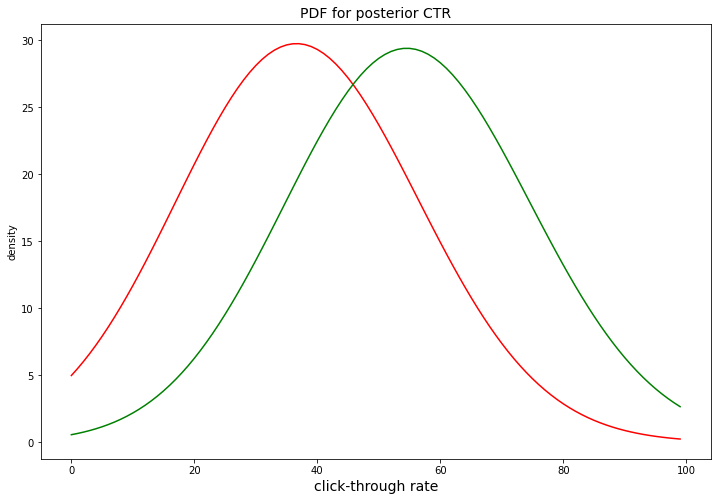

In [7]:
fig, ax = plt.subplots(figsize= (12, 8))
ax.plot(beta.pdf(p, clicked_A, not_clicked_A), 'r-') # email A
ax.plot(beta.pdf(p, clicked_B, not_clicked_B), 'g-') # email B
ax.set_title('PDF for posterior CTR', size= 14)
ax.set_xlabel('click-through rate', size= 14)
ax.set_ylabel('density');

In [8]:
n_trials = 10000 # number of samples from each distribution

posterior_A = beta(clicked_A, not_clicked_A)
posterior_B = beta(clicked_B, not_clicked_B)

posterior_A_sample = pd.Series([posterior_A.rvs() for _ in range(n_trials)])
posterior_B_sample = pd.Series([posterior_B.rvs() for _ in range(n_trials)])

post_B_win = sum(posterior_B_sample > posterior_A_sample) / n_trials
f"{post_B_win * 100:.2f} % of the times email B outperformed email A"

'74.63 % of the times email B outperformed email A'

#### Exercise 2.

In [9]:
clicked_A, not_clicked_A = 36, 114
clicked_B, not_clicked_B = 50, 100

prior_A_alpha, prior_A_beta = 30, 70
prior_B_alpha, prior_B_beta = 20, 80

In [10]:
clicked_A, not_clicked_A = clicked_A + prior_A_alpha, not_clicked_A + prior_A_beta
clicked_B, not_clicked_B = clicked_B + prior_B_alpha, not_clicked_B + prior_B_beta

In [11]:
posterior_A = beta(clicked_A, not_clicked_A)
posterior_B = beta(clicked_B, not_clicked_B)

posterior_A_sample = pd.Series([posterior_A.rvs() for _ in range(n_trials)])
posterior_B_sample = pd.Series([posterior_B.rvs() for _ in range(n_trials)])

post_B_win = sum(posterior_B_sample > posterior_A_sample) / n_trials
f"{post_B_win * 100:.2f} % of the times email B outperformed email A"

'65.48 % of the times email B outperformed email A'